In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import statistics as stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import preprocessing 
from scipy import stats as st
from random import randint
from scipy.stats import kstest
from scipy.stats import t
from matplotlib import pyplot as plt
sb.set()

In [2]:
df = pd.read_csv('telco.txt', sep='\t')
df.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn
1,13,44,Married,9,64,College degree,5,No,Male,3.70,0.0,Yes
2,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.40,35.7,Yes
3,68,52,Married,24,116,Did not complete high school,29,No,Female,18.15,0.0,No
4,33,33,Unmarried,12,33,High school degree,0,No,Female,9.45,0.0,Yes
5,23,30,Married,9,30,Did not complete high school,2,No,Male,6.30,0.0,No


In [3]:
# Task 1. Have a closer look at the definitions of the variables and analyze which of them might
# require a separate treatment. Consider for example the variable ed. There are two
# possibilities how the variable ed can be included into the model (one with dummy
# variables, the other one without dummies). Think about these two approaches and
# suggest which approach is more appropriate. Motivate your decision.

We have the following categorical variables in our dataset: marital (Married/Unmarried), retire (Yes/No), gender (Male/Female),
churn (Yes / No), ed (Did not complete high school, High school degree, Some college, College degree, Post-undergraduate degree).
There are two approaches of including variables in the model: Dummy Variable Encoding and Label Encoding.
Dummy Variable Encoding introduces  n−1  dummy variables with values 1 or 0 for each categorical variable with  n 
posible categories. So, variables above should be introduced in one dummy variabe per each of them. 

The second approach to introduce categorical variables into model is Label Encoding. So, for marital, retire, 
gender, churn label variables with values 0 and 1. The ed will be represented with values from 0 to 4 according to the
existing categories.
There is no difference between results of Label Encoding and Dummy Variable Encoding to the variables marital, retire, gender
and churn variables, but there is a huge difference with regards to the categorical variable ed.
But using the Dummy Variable Encoding for the ed variable will give us more precise model compare to Label Encoding,
having each variable independently from each other, than in the Label Encoding model.

In [4]:
# Dummy Encoding
dummy_df = pd.get_dummies(df, columns=(['marital', 'retire', 'gender', 'churn', 'ed']))
dummy_df.drop(columns=(['marital_Unmarried', 'retire_No', 'gender_Female', 'churn_No', 'ed_Post-undergraduate degree']), inplace=True)
dummy_df.rename(columns={'marital_Married': 'marital_dummy', 'retire_Yes': 'retire_dummy', 'gender_Male': 'gender_dummy', 
'churn_Yes': 'churn_dummy', 'ed_College degree': 'ed_dummy_college_degree', 'ed_Did not complete high school': 'ed_dummy_no_high_school',
'ed_High school degree': 'ed_dummy_high_school', 'ed_Some college': 'ed_dummy_some_college'}, inplace=True)

dummy_df.head()

,tenure,age,address,income,employ,longmon,wiremon,marital_dummy,retire_dummy,gender_dummy,churn_dummy,ed_dummy_college_degree,ed_dummy_no_high_school,ed_dummy_high_school,ed_dummy_some_college
1,13,44,9,64,5,3.70,0.0,1,0,1,1,1,0,0,0
2,11,33,7,136,5,4.40,35.7,1,0,1,1,0,0,0,0
3,68,52,24,116,29,18.15,0.0,1,0,0,0,0,1,0,0
4,33,33,12,33,0,9.45,0.0,0,0,0,1,0,0,1,0
5,23,30,9,30,2,6.30,0.0,1,0,1,0,0,1,0,0


In [5]:
#Label Encoding
label_df = df.copy()
label_df['marital'] = label_df['marital'].astype('category')
label_df['marital'] = label_df['marital'].cat.codes
label_df['retire'] = label_df['retire'].astype('category')
label_df['retire'] = label_df['retire'].cat.codes
label_df['gender'] = label_df['gender'].astype('category')
label_df['gender'] = label_df['gender'].cat.codes
label_df['churn'] = label_df['churn'].astype('category')
label_df['churn'] = label_df['churn'].cat.codes
label_df['ed'] = label_df['ed'].astype('category')
label_df['ed'] = label_df['ed'].cat.codes

label_df.head(5)

,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn
1,13,44,0,9,64,0,5,0,1,3.70,0.0,1
2,11,33,0,7,136,3,5,0,1,4.40,35.7,1
3,68,52,0,24,116,1,29,0,0,18.15,0.0,0
4,33,33,1,12,33,2,0,0,0,9.45,0.0,1
5,23,30,0,9,30,1,2,0,1,6.30,0.0,0


In [6]:
# Task 2. Consider now the dependent variable and the interval (metric) scaled explanatory variables. Plot these data and 
# decide if you wish to transform these x-variables and if there is a need to transform the y variable. You can also use 
# some measure of skewness to decide about y. The variable wiremon shows a very specific pattern. How would
# you take it into account?

In [7]:
print("Tenure skewness: %.5f" %st.skew(dummy_df['tenure']))
print("Age skewness: %.5f" %st.skew(dummy_df['age']))
print("Address skewness: %.5f" %st.skew(dummy_df['address']))
print("Income skewness: %.5f" %st.skew(dummy_df['income']))
print("Employ skewness: %.5f" %st.skew(dummy_df['employ']))
print("Wiremon skewness: %.5f" %st.skew(dummy_df['wiremon']))
print("Longmon skewness: %.5f" %st.skew(dummy_df['longmon']))

Tenure skewness: 0.11169
Age skewness: 0.35613
Address skewness: 1.10459
Income skewness: 6.63330
Employ skewness: 1.05946
Wiremon skewness: 1.60127
Longmon skewness: 2.96165


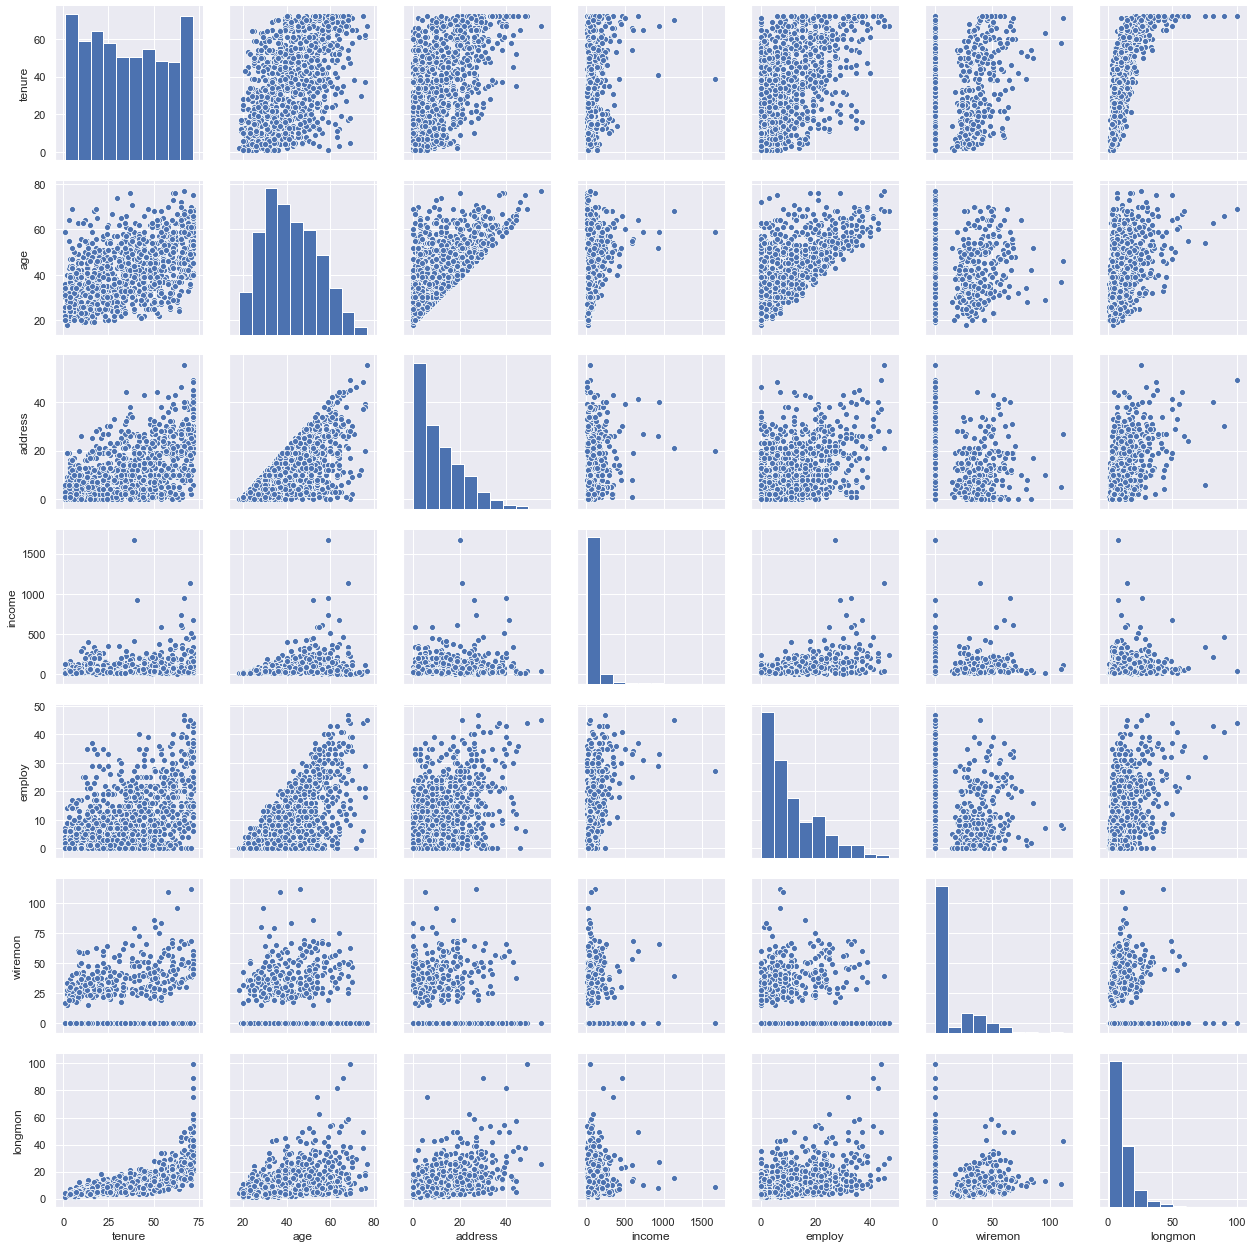

In [8]:
sb.pairplot(dummy_df.filter(['tenure', 'age', 'address', 'income', 'employ', 'wiremon','longmon']))

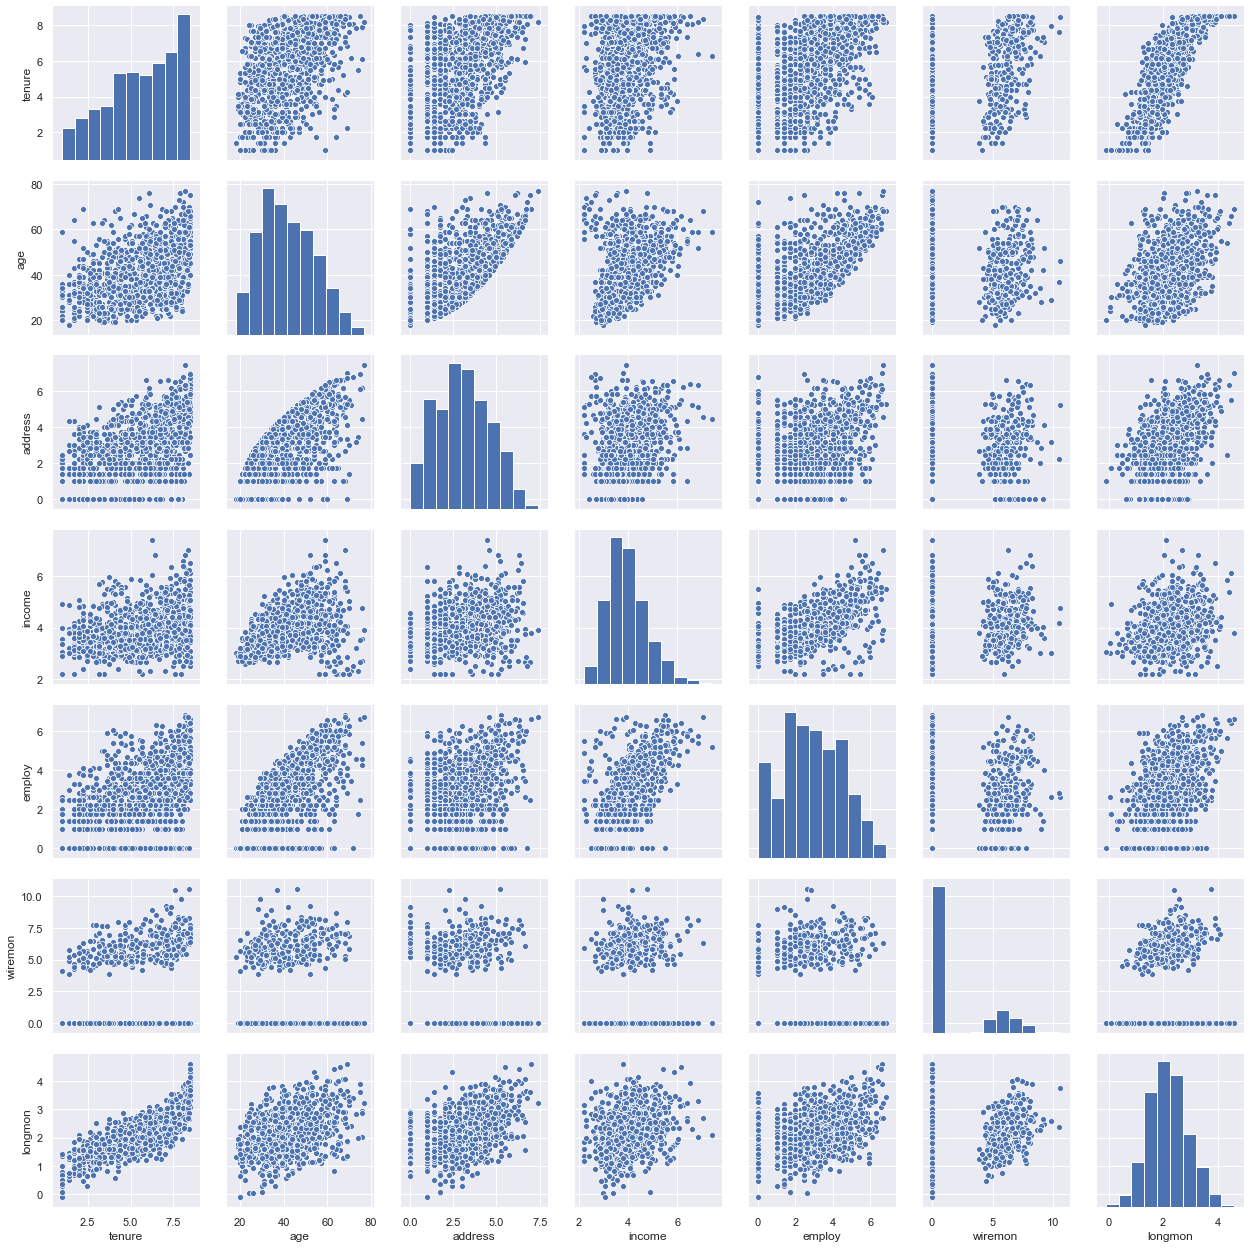

In [9]:
# We need to apply ln or take sqrt to make data close to normal
ln_dummy_df = dummy_df.copy()

ln_dummy_df['tenure'] = np.sqrt(ln_dummy_df['tenure'])
ln_dummy_df['income'] = np.log(ln_dummy_df['income'])
ln_dummy_df['address'] = np.sqrt(ln_dummy_df['address'])
ln_dummy_df['employ'] = np.sqrt(ln_dummy_df['employ'])
ln_dummy_df['wiremon'] = np.sqrt(ln_dummy_df['wiremon'])
ln_dummy_df['longmon'] = np.log(ln_dummy_df['longmon'])

#building pairplots filtering out all binary variables - those are not representable on scatterplots.
sb.pairplot(ln_dummy_df.filter(['tenure', 'age', 'address', 'income', 'employ', 'wiremon','longmon']))


In [10]:
# Task 3. After making up your decision about the above two problems run a simple linear regression. Pick up one of the 
# regressors. Write down the corresponding hypothesis of the t-test. Provide the formula for the test statistics, 
# explain the components of the formula and give the values for this components. Evaluate the goodness of the model.
# Explain in your own words the diference between R2 and adjusted R2.

In [11]:
research_values = dummy_df.columns.tolist()
research_values.remove("longmon")

X = dummy_df[research_values] 
y = dummy_df['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit() 
predictions = model.predict(X)

model.summary()

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     88.28
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          7.72e-163
Time:                        15:51:35   Log-Likelihood:                -3350.2
No. Observations:                1000   AIC:                             6730.
Df Residuals:                     985   BIC:                             6804.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.2439      1.384      0.899      0.369      -1.471       3.959
tenure                      0.2948      0.014     21.252      0.000       0.268       0.322
age                        -0.1238      0.029     -4.220      0.000      -0.181      -0.066
address                     0.1404      0.031      4.577      0.000       0.080       0.201
income                     -0.0002      0.003     -0.079      0.937      -0.005       0.005
employ                      0.1644      0.036      4.624      0.000       0.095       0.234
wiremon                    -0.0041      0.012     -0.339      0.735      -0.028       0.020
marital_dummy               1.0519      0.452      2.327      0.020       0.165       1.939
retire_dummy                7.6793      1.212      6.335      0.000       5.300      10.058
gender_dummy                0.4151      0.443      0.936      0.349      -0.455       1.285
churn_dummy                 0.2107      0.545      0.387      0.699      -0.859       1.281
ed_dummy_college_degree     1.2492      0.973      1.283      0.200      -0.661       3.159
ed_dummy_no_high_school    -0.3088      1.057     -0.292      0.770      -2.382       1.765
ed_dummy_high_school        1.0665      0.985      1.083      0.279      -0.867       3.000
ed_dummy_some_college       0.5980      1.003      0.596      0.551      -1.369       2.565
==============================================================================
Omnibus:                      709.767   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17574.523
Skew:                           2.924   Prob(JB):                         0.00
Kurtosis:                      22.687   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
freedom_deg =  1000 - len(research_values)
freedom_deg

986

Lets choose 'age' as dependent variable for our regression. If there exists a significant linear relationship between 
the independent variable X and the dependent variable Y, the slope will not equal zero. 
The null hypothesis states that the slope is equal to zero, and the alternative hypothesis states that the slope 
is not equal to zero. "H0: coefficient = 0" and alternativelly "H1: coefficient != 0".
- standard errors: from the table above, SE = 0.029 and coeficcient = -0.1238 
- degress of freedom and based on them critical value from the table DF = n - q-ty of variables = 1000 - 14 = 986,
critical value = 2.33
- Calculate t-statistics and compare it with t-value t = coefficient/SE = -0.1266/0.029 = -4.26 < 2.33, so 
we can not accept H0, so coefficient under 'age' is not equal to zero

In [13]:
-0.1237/0.029

-4.26551724137931

In [14]:
alpha = 0.01
t.ppf(1 - alpha, df=986)

2.3301357869419443

Explained variance of the response by the predictors is R-squared. Meaning of Adjusted R2 Both R2 and the adjusted R2 give 
you an idea of how many data points fall within the line of the regression equation. The main difference
between R2 and the adjusted R2: R2 assumes that every single variable explains the variation in the dependent variable. 
The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect 
the dependent variable.

In [15]:
# Task 4. Compute manually the predicted values from the above regression and the residuals.
# Make two plots: residuals vs. true y's and predicted y's vs. true y's. What do you
# expect in both cases and why? Do the obtained figures support your expectations?

In [16]:
X = dummy_df[research_values] 
y = dummy_df['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit() 
predictions = model.predict(X)
residuals = model.resid


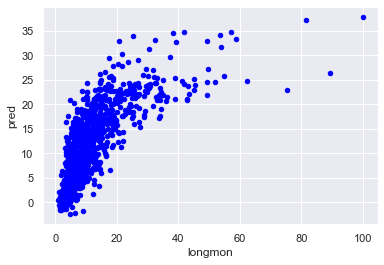

In [17]:
# Pot y-predivted vs y
dummy_df['pred'] = model.predict(X)
dummy_df.plot(kind='scatter',x='longmon',y='pred',color='blue')
plt.show()

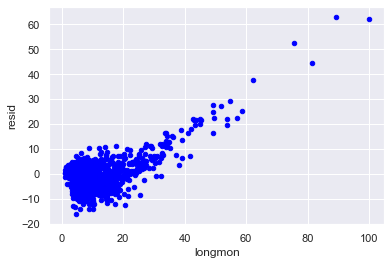

In [18]:
# Pot residuals vs y
dummy_df['resid'] = dummy_df['longmon'] - dummy_df['pred']
dummy_df.plot(kind='scatter',x='longmon',y='resid',color='blue')
plt.show()

We can see from the graphs that our model is not precise. The slope coefficient on the graph y / y-predicted is higher than 1. 
Rsiduals are not distributed normally because our R2 is only 0.55.

In [19]:
# Task 5. If you wish to argue that education is insignificant and use the model with dummies than you have to check the 
# simultaneous insignificance of all dummies which stem from the factor variable ed. Run a test for general linear hypothesis 
# and conclude about the significance of ed. Write down the matrix and the vector needed in the hypothesis.

We see that coefficients under Dummies are all insignificant. Alternativelly we can check if the categorical variable is 
significant itself. 
Example of Matrix for observation with 1st category:
d1: 1 0 0 0
d2: 0 0 0 0
d3: 0 0 0 0
d4: 0 0 0 0
    correspondig vector: 1 0 0 0

In [20]:
research_values = dummy_df.columns.tolist()
research_values

remove = ['longmon', 'ed_dummy_college_degree', 'ed_dummy_no_high_school','ed_dummy_high_school','ed_dummy_some_college', 'pred', 'resid']
for i in remove:
    research_values.remove(i)
research_values 

X = dummy_df[research_values] 
y = dummy_df['longmon'] 
X = sm.add_constant(X) 
model = sm.OLS(y, X.astype(float)).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          1.70e-165
Time:                        15:51:36   Log-Likelihood:                -3353.6
No. Observations:                1000   AIC:                             6729.
Df Residuals:                     989   BIC:                             6783.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0389      1.033      1.973      0.049       0.011       4.067
tenure            0.2955      0.014     21.299      0.000       0.268       0.323
age              -0.1267      0.029     -4.321      0.000      -0.184      -0.069
address           0.1385      0.031      4.513      0.000       0.078       0.199
income            0.0006      0.003      0.253      0.800      -0.004       0.006
employ            0.1533      0.034      4.460      0.000       0.086       0.221
wiremon           0.0004      0.011      0.031      0.976      -0.022       0.023
marital_dummy     1.0184      0.452      2.253      0.024       0.131       1.905
retire_dummy      7.8011      1.212      6.439      0.000       5.424      10.179
gender_dummy      0.3916      0.443      0.884      0.377      -0.478       1.261
churn_dummy       0.2599      0.542      0.479      0.632      -0.804       1.324
==============================================================================
Omnibus:                      712.952   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18093.009
Skew:                           2.934   Prob(JB):                         0.00
Kurtosis:                      22.995   Cond. No.                         808.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
len(model.params)

11

In [21]:
model.params

const            2.038941
tenure           0.295466
age             -0.126715
address          0.138519
income           0.000642
employ           0.153313
wiremon          0.000351
marital_dummy    1.018425
retire_dummy     7.801147
gender_dummy     0.391571
churn_dummy      0.259875
dtype: float64

In [28]:
M = np.zeros((4, 11), dtype=int)
M[0,7] = 1
M[1,8] = 1
M[2,9] = 1
M[3,10] = 1
M

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [26]:
print(model.f_test(M))

<F test: F=array([[11.18850014]]), p=7.009175334283531e-09, df_denom=989, df_num=4>


P-val of the F-test is lower than critical value, so we reject H0, and we can state that, coefficients under Dummy are jointly significantly different from zero.

In [ ]:
# Task 6. Provide an economic interpretation for the parameters of address, ed, and retire.
# Neglect the possible insignificance and keep in mind possible transformations of thevariables.

- 'address' - the quantity of years that person spent on the stated address. We can suggest, that the lower is the score, 
the more likely person will use long distance calls. We can try to cath this effect by introducing squre of this variable.
With 1 additional year of residence at current address person increase usege of the long distance call by 0.1385.

-'ed' education with 5 possible categories: 'Did not complete high school', 'High school degree', 'Some college', 
'College degree', 'Post-undergraduate degree' education that the person has, remain all other parametrs the same.

If person holds college_degree his/her usage of the long distance calls increase by 1.249203 comparing to basic category of people, that hold 'Post-undergraduate degree', remain all other parametrs the same.

If person has no high schooll degree his/her usage of the long distance calls decrease by 0.308775 comparing to basic category of people, that hold 'Post-undergraduate degree', remain all other parametrs the same.

If person holds highs school degree his/her usage of the long distance calls increase by 1.066462 comparing to basic category of people, that hold 'Post-undergraduate degree', remain all other parametrs the same.

If person holds some college gegree his/her usage of the long distance calls increase by 0.597958 comparing to basic category of people, that hold 'Post-undergraduate degree', remain all other parametrs the same.

-'retired' - if the person is retired the usage of long distance calls will increase by 7.8011, remain all other parametrs the same.

In [29]:
dummy_df['address'].describe()

count    1000.000000
mean       11.551000
std        10.086681
min         0.000000
25%         3.000000
50%         9.000000
75%        18.000000
max        55.000000
Name: address, dtype: float64

In [30]:
# Task 7. Compute the 95% confidence intervals for the parameters of address and income and provide its economic meaning. 
# Relate the CIs to the tests of significance, i.e. how would you use these intervals to decide about the significance of the 
# corresponding explanatory variables? The CIs are computed relying on the assumption, that the residuals follow normal 
# distribution. Is this assumption fulfilled? Run an appropriate goodness-of-fit test.

In [31]:
# Confidence intervals for the variable means
import numpy as np, scipy.stats as st

def confIntMean(a, conf=0.95):
    mean, sem, m = np.mean(a), st.sem(a), st.t.ppf((1+conf)/2., len(a)-1)
    return mean - m*sem, mean + m*sem

In [32]:
confIntMean(dummy_df['address'])

(10.925074161246476, 12.176925838753524)

In [33]:
confIntMean(dummy_df['income'])

(70.89240800052048, 84.17759199947952)

In [34]:
# Confidence intervals for betas
model.conf_int(alpha=0.05, cols=None)

,0,1
const,0.011346,4.066535
tenure,0.268244,0.322688
age,-0.184257,-0.069173
address,0.078290,0.198747
income,-0.004341,0.005625
employ,0.085852,0.220774
wiremon,-0.022154,0.022856
marital_dummy,0.131410,1.905439
retire_dummy,5.423615,10.178679
gender_dummy,-0.477998,1.261140


- 'address' coefficient is 0.14, lies in the interval [0.078741; 0.201317].It is always positive and has positive impact 
on the predicted value.
- 'income' coefficient is -0.00436, lies in the interval [-0.009117; 0.000600]. It can change the sign and can be zero.

In [35]:
# Tests for normality of residuals
# 1) Shapiro
shapiro_t, shapiro_pval = st.shapiro(dummy_df['resid'])
shapiro_pval

7.853572532075738e-33

The Shapiro-Wilk tests shows if a random sample came from a normal distribution. 
From the p-values below data under 'income' and 'address' are not normally distributed, because its value less than.05

In [36]:
st.shapiro(dummy_df['income'])

(0.4857470989227295, 0.0)

In [37]:
st.shapiro(dummy_df['address'])

(0.8969001173973083, 2.3607352842030847e-25)

In [38]:
# Task 8. Many of the variable appear insignificant and we should find the smallest model, which still has a good explanatory power.
# Choose this model using stepwise model selection (either based on the tests for R2 or using AIC/BIC). Pick up the last step 
# of the model selection procedure and explain in details how the method/approach works (or is implemented in your software). 
# Work with this model in all the remaining steps.

In [39]:
# Create list of iterations of variables
from itertools import compress, product
def iterations(items):
    return ( set(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) )

In [40]:
research_values =['tenure', 'age', 'address', 'income','employ', 'wiremon']
# Run regression on different iterations
combination_list = list(iterations(research_values))
combination_list.remove(set())

stats_final = pd.DataFrame()
y = df['longmon'] 

for comb in combination_list:
    Xt = df[list(comb)] 

    Xt = sm.add_constant(Xt) 

    modelt = sm.OLS(y, Xt.astype(float)).fit() 
    # Filter models by p-value
    if (modelt.pvalues[1:] <= 0.05).all():
        
        stats = {'Iteration': str(list(comb)), 'R2': modelt.rsquared_adj, 'aic': modelt.aic, 'bic': modelt.bic}
        stats = pd.DataFrame([stats])
        stats_final = stats_final.append(pd.DataFrame(stats))
        
    else:
        pass

In [41]:
stats_final

,Iteration,R2,aic,bic
0,['wiremon'],0.003087,7513.361021,7523.176532
0,['employ'],0.219313,7268.871235,7278.686745
0,['income'],0.036914,7478.839539,7488.655050
0,"['income', 'employ']",0.221628,7266.899139,7281.622405
0,"['income', 'wiremon', 'employ']",0.224069,7264.755315,7284.386336
0,['address'],0.216029,7273.068822,7282.884333
0,"['address', 'wiremon']",0.218598,7270.785034,7285.508299
0,"['address', 'employ']",0.297180,7164.795844,7179.519110
0,"['income', 'address']",0.223615,7264.342868,7279.066133
0,"['income', 'address', 'wiremon', 'employ']",0.301603,7160.474982,7185.013758


In [42]:
# Choose the best combination of parameters for model
stats_final = stats_final.sort_values(['R2', 'aic', 'bic'], ascending=[False, True, True]).reset_index()
result_iterztion = stats_final['Iteration'][0]
result_iterztion

"['tenure', 'address', 'employ', 'age']"

In [43]:
best_iteration = [ 'tenure', 'address', 'age', 'employ']

In [44]:
X = df[best_iteration] 
y = df['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     282.6
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          2.69e-162
Time:                        15:56:59   Log-Likelihood:                -3377.2
No. Observations:                1000   AIC:                             6764.
Df Residuals:                     995   BIC:                             6789.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8890      0.929      0.957      0.339      -0.935       2.713
tenure         0.2949      0.013     22.200      0.000       0.269       0.321
address        0.1394      0.031      4.466      0.000       0.078       0.201
age           -0.0698      0.028     -2.451      0.014      -0.126      -0.014
employ         0.1508      0.032      4.787      0.000       0.089       0.213
==============================================================================
Omnibus:                      749.239   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21061.209
Skew:                           3.123   Prob(JB):                         0.00
Kurtosis:                      24.597   Cond. No.                         254.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Task 9. Sometimes data contains outliers which induces bias in the parameter estimates. Check for outliers using Cook's 
# distance and leverage. Have a closer look at the observation with the highest leverage (regardless if it is classified as an
# outlier or not). What makes this observation so outstanding (you may have a look at Box-plots for interval scaled
# variables or at the frequencies for binary/ordinal variables?

In [46]:
# model.get_influence().summary_frame()
infl = model.get_influence()
sm_fr = infl.summary_frame()
len(sm_fr.loc[sm_fr['cooks_d'] >= 0.05])

4

By Coock's distance we have detected 5 outliers lets remove them.

In [47]:
remove_index = (sm_fr.loc[sm_fr['cooks_d'] >= 0.05]).index.values.tolist()
dummy_df.loc[remove_index]

,tenure,age,address,income,employ,longmon,wiremon,marital_dummy,retire_dummy,gender_dummy,churn_dummy,ed_dummy_college_degree,ed_dummy_no_high_school,ed_dummy_high_school,ed_dummy_some_college,pred,resid
200,72,66,30,460,41,89.40,0.0,0,0,0,0,1,0,0,0,26.407426,62.992574
207,72,69,49,44,44,99.95,0.0,1,1,0,0,0,0,1,0,37.831726,62.118274
326,72,54,6,345,32,75.45,0.0,1,0,1,0,0,1,0,0,22.976011,52.473989
352,72,63,40,222,43,81.55,0.0,1,1,0,0,0,0,1,0,37.109376,44.440624


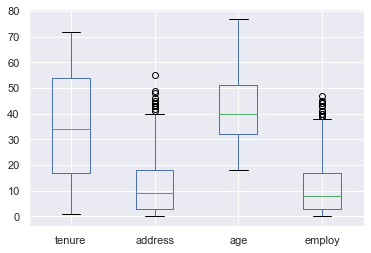

In [48]:
#Box-plots before removal of outliers
boxplot_0 = df[['tenure', 'address', 'age', 'employ']].boxplot()

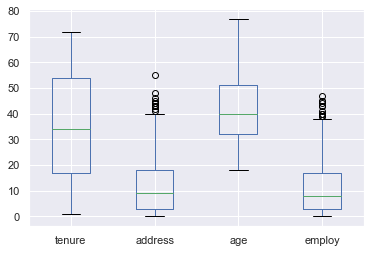

In [49]:
#Box-plots after removal of outliers

df_wo = dummy_df.drop(index = remove_index)
# df.shape
boxplot_1 = df_wo[['tenure', 'address', 'age', 'employ']].boxplot()

In [50]:
df_wo.shape

(996, 17)

In [51]:
# Task 10. Frequently data is missing. Pick up 5 rows in the data set and delete the value for address. Implement at least two
# approaches to fill in these values. Write down the corresponding formulas/model and give motivation for your approach. 
# If you use standard routines then check how exactly the data imputation is implemented. How would you proceed if the value 
# of the binary variable retire is missing? Implementation is not required.

If randomly delete 5 vars it will be MAR case. SO we can use:
cold imputation: the missing value is replaced with the value of the most similar observation;
hot imputation: the missing value is replaced with some random but possible value
regression imputation: the missing value is forecasted using some model (regression)
mean imputation: the missing value is replaced with the mean of the observed values

In [52]:
# Randomly drop 5 observations for 'address' var
df_wo['address_dropped'] = df_wo['address']

# Check the position of column 'address_dropped'
column_no = df_wo.columns.get_loc('address_dropped')
column_no

17

In [53]:
# Randomly drop 5 observations for 'address' var
#2. Drop random cells from column 'address_dropped'
for i in range(0,5):
    j = np.random.randint(951)
    df_wo.iloc[[j], [column_no]] = np.nan

In [54]:
# Quantity of dropped cells
df_wo['address_dropped'].isna().sum()

5

In [55]:
df_wo.loc[df_wo['address_dropped'].isna()]['address_dropped']

28    NaN
158   NaN
276   NaN
409   NaN
705   NaN
Name: address_dropped, dtype: float64

In [56]:
na_rows = df_wo.loc[df_wo['address_dropped'].isna()].index

In [57]:
df_wo.head()

,tenure,age,address,income,employ,longmon,wiremon,marital_dummy,retire_dummy,gender_dummy,churn_dummy,ed_dummy_college_degree,ed_dummy_no_high_school,ed_dummy_high_school,ed_dummy_some_college,pred,resid,address_dropped
1,13,44,9,64,5,3.70,0.0,1,0,1,1,1,0,0,0,4.629937,-0.929937,9.0
2,11,33,7,136,5,4.40,35.7,1,0,1,1,0,0,0,0,3.711715,0.688285,7.0
3,68,52,24,116,29,18.15,0.0,1,0,0,0,0,1,0,0,23.710923,-5.560923,24.0
4,33,33,12,33,0,9.45,0.0,0,0,0,1,0,0,1,0,9.843451,-0.393451,12.0
5,23,30,9,30,2,6.30,0.0,1,0,1,0,0,1,0,0,7.055894,-0.755894,9.0


In [58]:
# Create list of vars for imputation
best_list = ['marital_dummy', 'address', 'employ', 'age', 'tenure', 'retire_dummy']
impute_comb = best_list
impute_comb.remove('address')
impute_comb.append('address_dropped')
impute_comb

['marital_dummy', 'employ', 'age', 'tenure', 'retire_dummy', 'address_dropped']

In [59]:
# I Mean imputation
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_wo[impute_comb])
SimpleImputer()
df_impute1 = imp_mean.transform(df_wo[impute_comb])
index1 = df_wo[impute_comb].index.values.tolist()
df_impute1 = pd.DataFrame(data=df_impute1,    
                index=index1,
                columns=impute_comb)
df_impute1.loc[na_rows]

,marital_dummy,employ,age,tenure,retire_dummy,address_dropped
28,1.0,5.0,33.0,25.0,0.0,11.502523
158,0.0,12.0,35.0,15.0,0.0,11.502523
276,1.0,6.0,33.0,65.0,0.0,11.502523
409,0.0,5.0,34.0,39.0,0.0,11.502523
705,0.0,6.0,33.0,1.0,0.0,11.502523


In [60]:
# II Multivariate feature imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=2, random_state=1)
imp.fit(df_wo.drop(na_rows, axis=0)[impute_comb])

IterativeImputer(random_state=0)
X_test = df_wo.loc[na_rows][impute_comb]
# # the model learns that the second feature is double the first
df_impute2 = imp.transform(X_test)

df_impute2 = pd.DataFrame(data=df_impute2,    
#                 index=index1,
                columns=impute_comb)

# # Replaced values by 
df_impute2

,marital_dummy,employ,age,tenure,retire_dummy,address_dropped
0,1.0,5.0,33.0,25.0,0.0,11.502523
1,0.0,12.0,35.0,15.0,0.0,11.502523
2,1.0,6.0,33.0,65.0,0.0,11.502523
3,0.0,5.0,34.0,39.0,0.0,11.502523
4,0.0,6.0,33.0,1.0,0.0,11.502523


In [61]:
# Task 11. We consider now the model you have worked with so far and the model with original y if
# you applied some transformation OR the model with log(y) if you have not transformed
# y. Run an appropriate test to decide which of the models is superior. Explain, the
# idea of the test and why you cannot make a similar decision using AIC/BIC, etc.

In [62]:
# Create log of predicted variables from original model
best_list = ['marital_dummy', 'address', 'employ', 'age', 'tenure', 'retire_dummy']
X = df_wo[best_list] 
y = df_wo['longmon'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit() ## sm.OLS(output, input)
df_wo['predictions'] = model.predict(X)

# Create log of predictions
df_wo['l_predictions'] = np.log(df_wo['predictions'])

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [63]:
#Create log of predicted varaible and run OLS on it
df_wo['l_longmon'] = np.log(df_wo['longmon'])

X = df_wo[best_iteration] 
y = df_wo['l_longmon'] 
X = sm.add_constant(X) 

model_l = sm.OLS(y, X.astype(float)).fit()
df_wo['ln_predictions'] = model_l.predict(X)

In [64]:
# Find difference between log of predictions from the first model and model runned on log(y)
df_wo = df_wo.fillna(0)
df_wo['delta_ln']  = df_wo['l_predictions'] - df_wo['ln_predictions']

In [65]:
# Run regression with this difference included

best_list.append('delta_ln')
X = df_wo[best_iteration] 
best_list.remove('delta_ln')
y = df_wo['longmon'] 
X = sm.add_constant(X)
model_delta = sm.OLS(y, X.astype(float)).fit() 
model_delta.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     338.2
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          1.64e-183
Time:                        15:57:20   Log-Likelihood:                -3195.8
No. Observations:                 996   AIC:                             6402.
Df Residuals:                     991   BIC:                             6426.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7836      0.786      0.997      0.319      -0.758       2.326
tenure         0.2960      0.011     26.325      0.000       0.274       0.318
address        0.1008      0.027      3.785      0.000       0.049       0.153
age           -0.0433      0.024     -1.792      0.073      -0.091       0.004
employ         0.0746      0.027      2.774      0.006       0.022       0.127
==============================================================================
Omnibus:                      400.542   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2412.295
Skew:                           1.736   Prob(JB):                         0.00
Kurtosis:                       9.787   Cond. No.                         252.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Task 12. We compare the predictive ability of the estimated regression. Consider the model
# you worked so far and the original model with the same y but without transformation
# and selection of features. Compare the two models using leave-one-out CV and 5-fold
# CV. Explain the idea of this technique with formulas and draw a conclusion about the
# predictive ability of the models.

In [67]:
dummy_df.head()

,tenure,age,address,income,employ,longmon,wiremon,marital_dummy,retire_dummy,gender_dummy,churn_dummy,ed_dummy_college_degree,ed_dummy_no_high_school,ed_dummy_high_school,ed_dummy_some_college,pred,resid
1,13,44,9,64,5,3.70,0.0,1,0,1,1,1,0,0,0,4.629937,-0.929937
2,11,33,7,136,5,4.40,35.7,1,0,1,1,0,0,0,0,3.711715,0.688285
3,68,52,24,116,29,18.15,0.0,1,0,0,0,0,1,0,0,23.710923,-5.560923
4,33,33,12,33,0,9.45,0.0,0,0,0,1,0,0,1,0,9.843451,-0.393451
5,23,30,9,30,2,6.30,0.0,1,0,1,0,0,1,0,0,7.055894,-0.755894


In [68]:
# Initial model 
research_values = ['tenure', 'age', 'address', 'income',  'employ',  'wiremon',  'retire_dummy',  'marital_dummy',  'gender_dummy',  'churn_dummy']
# dummy_df.head(5)
X0 = dummy_df[research_values] 
y0 = dummy_df['longmon'] 
X0 = sm.add_constant(X0) 
model0 = sm.OLS(y0, X0.astype(float)).fit() 
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          1.70e-165
Time:                        15:57:22   Log-Likelihood:                -3353.6
No. Observations:                1000   AIC:                             6729.
Df Residuals:                     989   BIC:                             6783.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0389      1.033      1.973      0.049       0.011       4.067
tenure            0.2955      0.014     21.299      0.000       0.268       0.323
age              -0.1267      0.029     -4.321      0.000      -0.184      -0.069
address           0.1385      0.031      4.513      0.000       0.078       0.199
income            0.0006      0.003      0.253      0.800      -0.004       0.006
employ            0.1533      0.034      4.460      0.000       0.086       0.221
wiremon           0.0004      0.011      0.031      0.976      -0.022       0.023
retire_dummy      7.8011      1.212      6.439      0.000       5.424      10.179
marital_dummy     1.0184      0.452      2.253      0.024       0.131       1.905
gender_dummy      0.3916      0.443      0.884      0.377      -0.478       1.261
churn_dummy       0.2599      0.542      0.479      0.632      -0.804       1.324
==============================================================================
Omnibus:                      712.952   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18093.009
Skew:                           2.934   Prob(JB):                         0.00
Kurtosis:                      22.995   Cond. No.                         808.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Final model
X = df_wo[best_list] 
y = df_wo['l_longmon'] 
X = sm.add_constant(X) 
model = sm.OLS(y, X.astype(float)).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              l_longmon   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     404.6
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          3.51e-262
Time:                        15:57:23   Log-Likelihood:                -470.50
No. Observations:                 996   AIC:                             955.0
Df Residuals:                     989   BIC:                             989.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1913      0.054     21.908      0.000       1.085       1.298
marital_dummy     0.0616      0.025      2.434      0.015       0.012       0.111
address           0.0030      0.002      1.743      0.082      -0.000       0.006
employ            0.0011      0.002      0.615      0.539      -0.002       0.005
age              -0.0019      0.002     -1.137      0.256      -0.005       0.001
tenure            0.0276      0.001     36.986      0.000       0.026       0.029
retire_dummy      0.1669      0.066      2.531      0.012       0.037       0.296
==============================================================================
Omnibus:                        4.430   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.288
Skew:                          -0.151   Prob(JB):                        0.117
Kurtosis:                       3.108   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.9482099054411101
0.22109804358730634


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [71]:
from sklearn.model_selection import cross_val_score
clf = SVR(C=1.0, epsilon=0.2)
scores = cross_val_score(clf, X, y, cv=5)
clf.fit(X, y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The defa

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
X0_train, X0_test, y0_train, y0_test = train_test_split(
    X0, y0, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

from sklearn.svm import SVR
svr = SVR()
svr.fit(X0_train, y0_train)
print(svr.score(X0_train, y0_train))
print(svr.score(X0_test, y0_test))

0.03566353231554864
-0.08269683151821883


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
